<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression" data-toc-modified-id="Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Regression</a></span><ul class="toc-item"><li><span><a href="#Data-Set" data-toc-modified-id="Data-Set-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Set</a></span></li><li><span><a href="#The-Goal" data-toc-modified-id="The-Goal-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>The Goal</a></span></li><li><span><a href="#Explore-the-relationships" data-toc-modified-id="Explore-the-relationships-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Explore the relationships</a></span></li><li><span><a href="#Issues" data-toc-modified-id="Issues-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Issues</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Adding-higher-order-terms" data-toc-modified-id="Adding-higher-order-terms-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Adding higher-order terms</a></span></li><li><span><a href="#OLS-model-from-scratch" data-toc-modified-id="OLS-model-from-scratch-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>OLS model from scratch</a></span></li><li><span><a href="#Furture-Directions" data-toc-modified-id="Furture-Directions-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Furture Directions</a></span><ul class="toc-item"><li><span><a href="#Weighted-Least-Square" data-toc-modified-id="Weighted-Least-Square-1.8.1"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Weighted Least Square</a></span></li><li><span><a href="#Fitting-multiple-regression-equations" data-toc-modified-id="Fitting-multiple-regression-equations-1.8.2"><span class="toc-item-num">1.8.2&nbsp;&nbsp;</span>Fitting multiple regression equations</a></span></li></ul></li></ul></li></ul></div>

# Regression
## Data Set
* Numerical data
* 3 columns
* 3 rows

## The Goal
* Build a regression model which explains column C by a function of A and B
* Do not use available ML libraries. Start from scratch.

In [1]:
# Load libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Read the data set
df = pd.read_csv('./Data/Regression.csv', header = None, names = ['A','B','C'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
A    300 non-null float64
B    300 non-null float64
C    300 non-null float64
dtypes: float64(3)
memory usage: 7.1 KB


## Explore the relationships
* Plot scatter plot for A and C
* Plot scatter plot for B and C

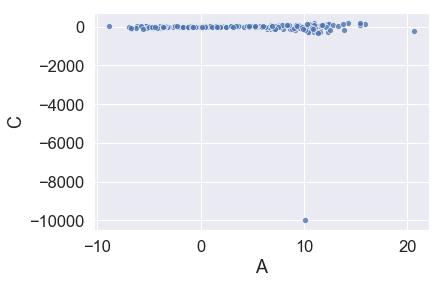

In [533]:
# Scatter plot for A and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.A, y = df.C, alpha = 0.8)

There seems to be one outlier. We need to get rid of the outlier.

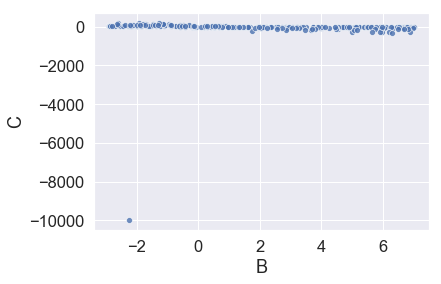

In [534]:
# Scatter plot for B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.B, y = df.C, alpha = 0.8)

The scatter plot for B and C shows an outlier too.

Remove the outlier.

In [2]:
df = df[df.C > -2000]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 3 columns):
A    299 non-null float64
B    299 non-null float64
C    299 non-null float64
dtypes: float64(3)
memory usage: 9.3 KB


Replot the above scatter plots.

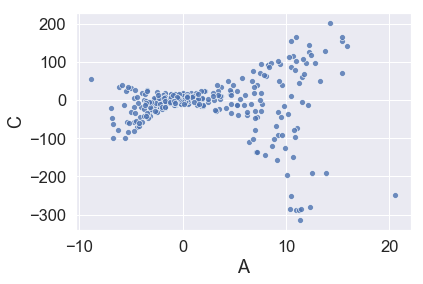

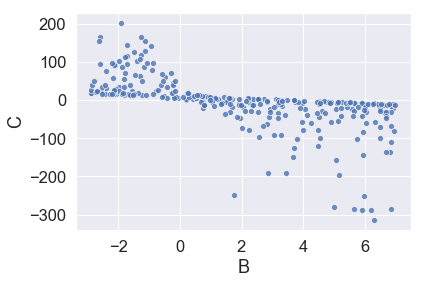

In [537]:
# Scatter plot for A and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.A, y = df.C, alpha = 0.8)

# Scatter plot for B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.B, y = df.C, alpha = 0.8)

Check about the relation between the predictors, A and B.

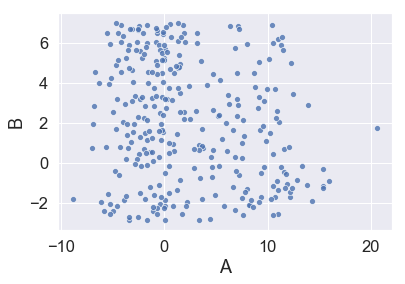

In [538]:
# Scatter plot for A and B
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.A, y = df.B, alpha = 0.8)

A and B are not correlated, which is good

## Issues
There are two issues reflected from the scatter plots between the response variable and the predictors:
1. Nonlinearity: C and A have a curvilinear relationship
2. Heterscedasticty: data in C has unstable variance 

To remediate,
* Normalize data
* Try to transform the response variable and/or the predictors

If the above do not fix the issue:
* Add higher order terms in the regression model to fit the curviliear relationship
* Apply iteratively reweighted least squares to mitigate the unconstant variance of error

In [539]:
df.describe()

,A,B,C
count,299.000000,299.000000,299.000000
mean,2.290979,2.027339,-8.259116
std,5.686893,2.993552,71.321872
min,-8.860000,-2.890000,-315.000000
25%,-1.950000,-0.587000,-23.100000
50%,0.447000,1.940000,-2.940000
75%,7.025000,4.705000,16.300000
max,20.600000,7.000000,202.000000


Data in column C has a very large standard deviation, considering **normalizing data**.

In [3]:
# Normalize data
df_norm = (df-df.mean())/df.std()

In [541]:
df_norm.head()

,A,B,C
0,-0.316690,-0.737365,0.277041
1,-0.650791,-1.088118,0.281248
2,-0.237033,0.829336,0.070373
3,0.224907,1.016405,-0.219300
4,-0.701786,1.631059,-0.194062


In [542]:
df_norm.describe()

,A,B,C
count,2.990000e+02,2.990000e+02,2.990000e+02
mean,-2.584332e-16,-7.199741e-16,5.272631e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.960821e+00,-1.642644e+00,-4.300797e+00
25%,-7.457463e-01,-8.733234e-01,-2.080832e-01
50%,-3.242508e-01,-2.917575e-02,7.457903e-02
75%,8.324442e-01,8.944761e-01,3.443420e-01
max,3.219512e+00,1.661124e+00,2.948031e+00


From the description above, I noticed that outliers still exist, see the max and the min of A and C. They contain values either larger than 3 or smaller than -3 (note this is the z score). Therefore, remove the remaining outliers too.

In [4]:
df_norm = df_norm[(df_norm.A <= 3)&(df_norm.C >= -3)]

In [5]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291 entries, 0 to 299
Data columns (total 3 columns):
A    291 non-null float64
B    291 non-null float64
C    291 non-null float64
dtypes: float64(3)
memory usage: 9.1 KB


Now we have removed the outliers and there are 291 rows left. <br>
Let's check about the relationship again.

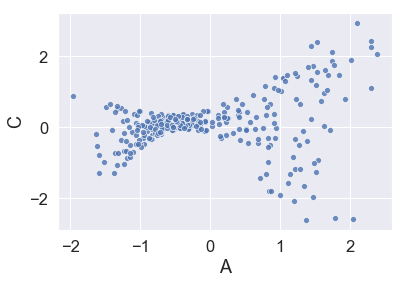

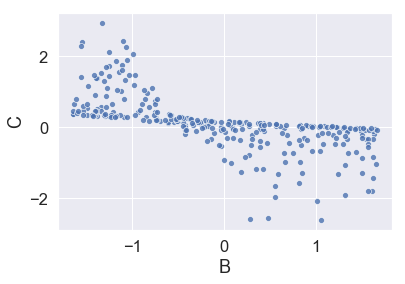

In [545]:
# Scatter plot for A and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.A, y = df_norm.C, alpha = 0.8)

# Scatter plot for B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.B, y = df_norm.C, alpha = 0.8)

The issues of unstable variance and non-linear relation between A and C still exist. Let's try to transform variables to linearize the model.

## Data Transformation

Take a look at the distributions of A, B, C

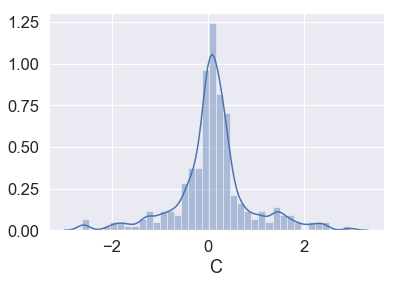

In [546]:
sns.distplot(df_norm.C)

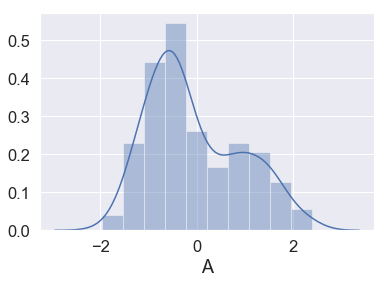

In [547]:
sns.distplot(df_norm.A)

A seems to be a bimodal distriubtion.

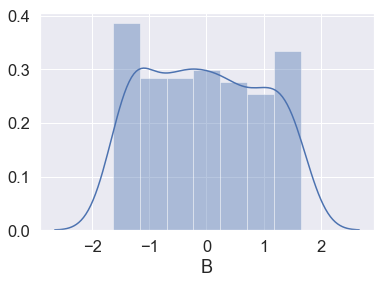

In [548]:
sns.distplot(df_norm.B)

B seems to be an uniform distribution, but with slightly more data on the two ends.

There are many approaches for data transformation, for example, log, square root, exponential, inverse, box-cox power transformation, etc.. Log, square root, and box-cox require data to be positive, but there are negative values in our data set, we don't want to lose these data points. So, try:
* Transform predictors using inverse
* Transform response using inverse
* Transform both using inverse
* Transform predictors using exponential
* Transform response using exponential
* Transform both using exponential

Text(0.5, 0, 'A_inverse')

Text(0.5, 0, 'B_inverse')

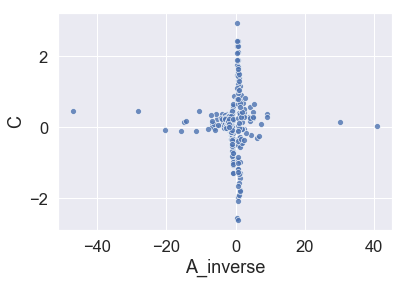

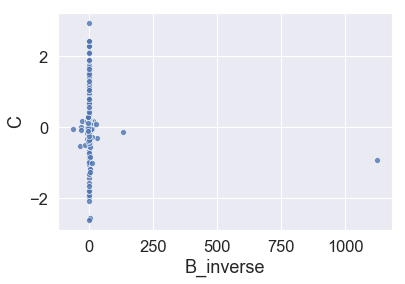

In [549]:
# inverse predictors -> does not help
fig1 = plt.figure()
sns.scatterplot(x = 1/df_norm.A, y = df_norm.C, alpha = 0.8)
plt.xlabel('A_inverse')

fig2 = plt.figure()
sns.scatterplot(x = 1/df_norm.B, y = df_norm.C, alpha = 0.8)
plt.xlabel('B_inverse')

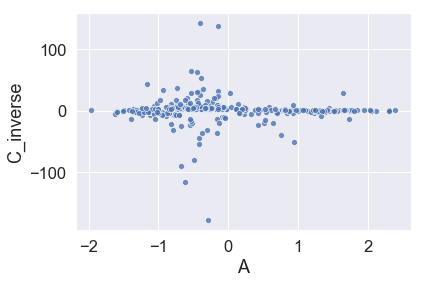

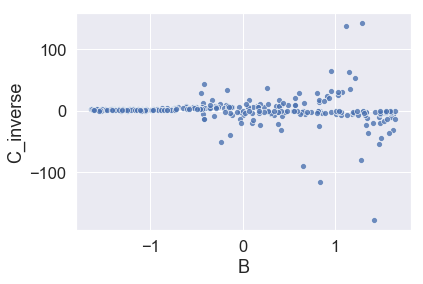

In [144]:
# Inverse the response -> does not help
df_norm['C_inverse'] = 1/df_norm.C

fig = plt.figure()
sns.scatterplot(x = df_norm.A, y = df_norm[(df_norm.C_inverse>-500)&(df_norm.C_inverse<500)]['C_inverse'], alpha = 0.8)

fig = plt.figure()
sns.scatterplot(x = df_norm.B, y = df_norm[(df_norm.C_inverse>-500)&(df_norm.C_inverse<500)]['C_inverse'], alpha = 0.8)

Text(0.5, 0, 'A_inverse')

Text(0.5, 0, 'B_inverse')

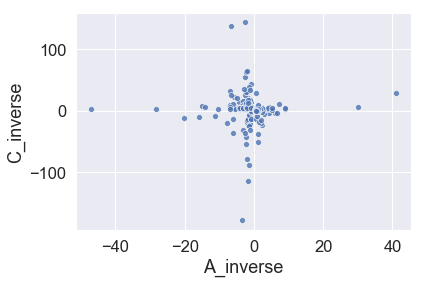

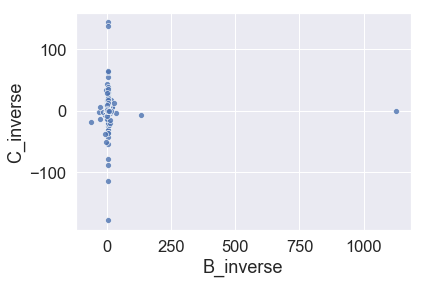

In [551]:
# Inverse both -> does not help
fig = plt.figure()
sns.scatterplot(x = 1/df_norm.A, y = df_norm[(df_norm.C_inverse>-500)&(df_norm.C_inverse<500)]['C_inverse'], alpha = 0.8)
plt.xlabel('A_inverse')

fig = plt.figure()
sns.scatterplot(x = 1/df_norm.B, y = df_norm[(df_norm.C_inverse>-500)&(df_norm.C_inverse<500)]['C_inverse'], alpha = 0.8)
plt.xlabel('B_inverse')

The relationships between response variable and predictors diminish after inverse transform.
Therefore, inverse transformation does not seem to be appropriate here.

Text(0.5, 0, 'exp(A)')

Text(0.5, 0, 'exp(B)')

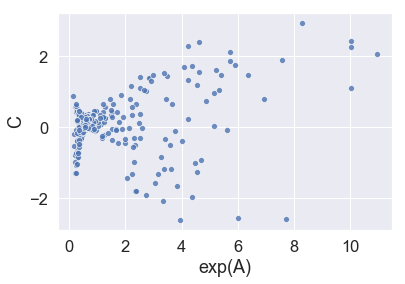

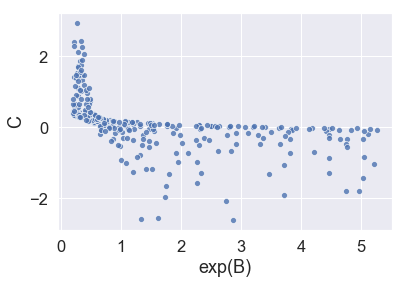

In [552]:
# exponetial predictors -> does not help
fig1 = plt.figure()
sns.scatterplot(x = np.exp(df_norm.A), y = df_norm.C, alpha = 0.8)
plt.xlabel('exp(A)')
fig2 = plt.figure()
sns.scatterplot(x = np.exp(df_norm.B), y = df_norm.C, alpha = 0.8)
plt.xlabel('exp(B)')

Text(0, 0.5, 'exp(C)')

Text(0, 0.5, 'exp(C)')

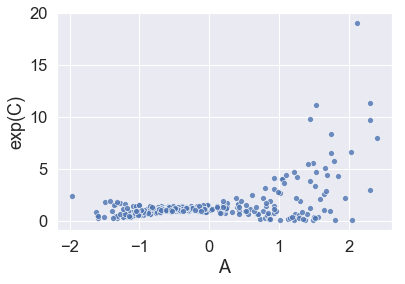

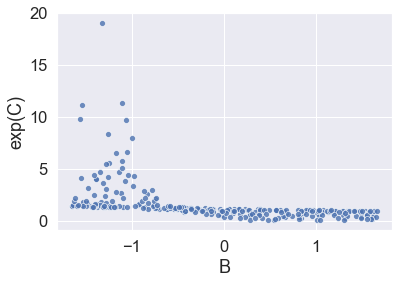

In [515]:
# exponetial response -> does not help
fig1 = plt.figure()
sns.scatterplot(x = df_norm.A, y = np.exp(df_norm.C), alpha = 0.8)
plt.ylabel('exp(C)')
fig2 = plt.figure()
sns.scatterplot(x = df_norm.B, y = np.exp(df_norm.C), alpha = 0.8)
plt.ylabel('exp(C)')

Text(0.5, 0, 'exp(A)')

Text(0, 0.5, 'exp(C)')

Text(0.5, 0, 'exp(B)')

Text(0, 0.5, 'exp(C)')

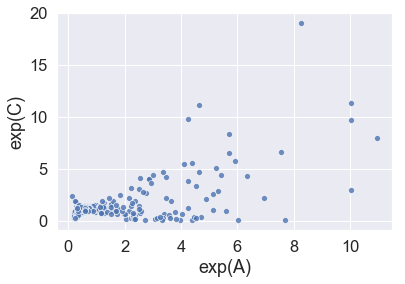

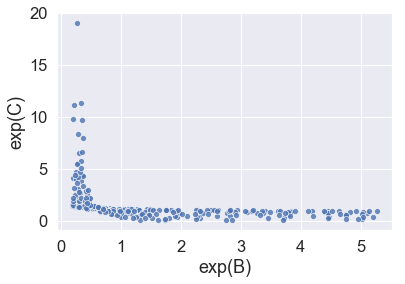

In [553]:
# exponetial both -> does not help
fig1 = plt.figure()
sns.scatterplot(x = np.exp(df_norm.A), y = np.exp(df_norm.C), alpha = 0.8)
plt.xlabel('exp(A)')
plt.ylabel('exp(C)')
fig2 = plt.figure()
sns.scatterplot(x = np.exp(df_norm.B), y = np.exp(df_norm.C), alpha = 0.8)
plt.xlabel('exp(B)')
plt.ylabel('exp(C)')

The heteroscedasticity and nonlinearity issues are still obvious after exponential transformation. Therefore, exponential transformation is not proper either. <br>
Try Yeo-Johnson transformatoin, which can handle non-positive values.

Text(0.5, 0, '')

Text(0.5, 1.0, 'Probplot against normal distribution')

Text(0.5, 1.0, 'Probplot after Yeo-Johnson transformation')

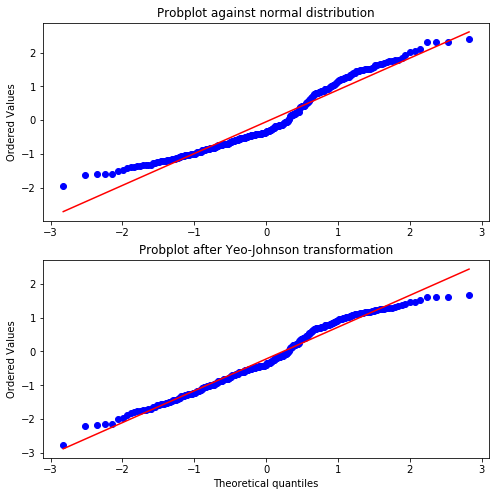

In [17]:
# Transform A
from scipy import stats

fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(211)
A = df_norm.A.values
prob = stats.probplot(A, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
At, lmbda = stats.yeojohnson(A)
prob = stats.probplot(At, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()

Text(0.5, 0, '')

Text(0.5, 1.0, 'Probplot against normal distribution')

Text(0.5, 1.0, 'Probplot after Yeo-Johnson transformation')

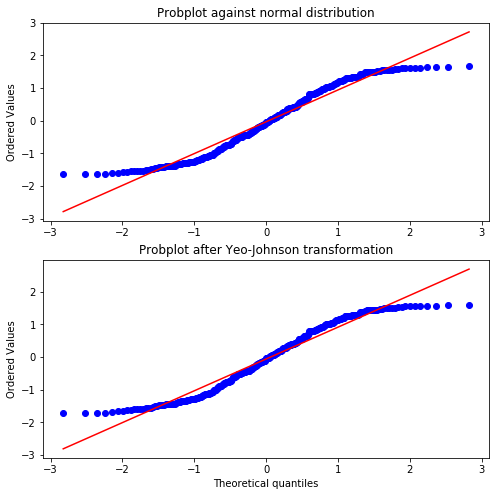

In [18]:
# Transform B
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(211)
B = df_norm.B.values
prob = stats.probplot(B, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
Bt, lmbda = stats.yeojohnson(B)
prob = stats.probplot(Bt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()

Text(0.5, 0, '')

Text(0.5, 1.0, 'Probplot against normal distribution')

Text(0.5, 1.0, 'Probplot after Yeo-Johnson transformation')

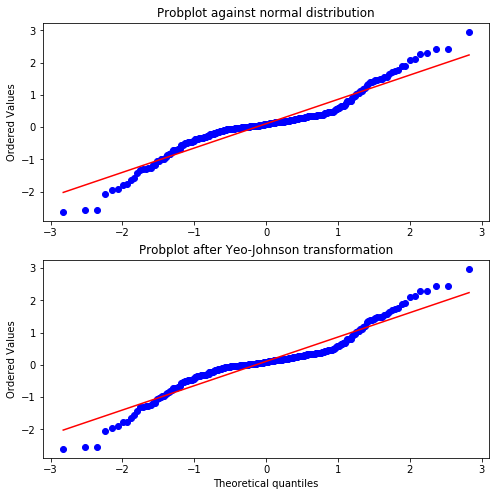

In [21]:
# Transform C
fig = plt.figure(figsize = (8,8))
ax1 = fig.add_subplot(211)
C = df_norm.C.values
prob = stats.probplot(C, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(212)
Ct, lmbda = stats.yeojohnson(C)
prob = stats.probplot(Ct, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Yeo-Johnson transformation')

plt.show()

Text(0.5, 0, 'Yeo-Johnson Transformation of A')

Text(0, 0.5, 'Yeo-Johnson Transformation of C')

Text(0.5, 0, 'Yeo-Johnson Transformation of B')

Text(0, 0.5, 'Yeo-Johnson Transformation of C')

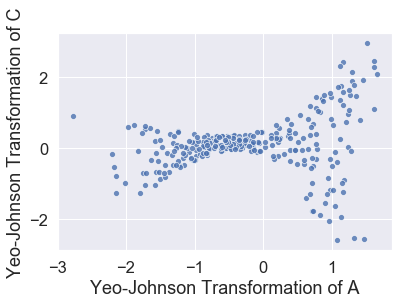

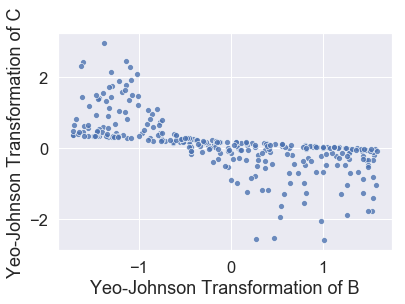

In [145]:
# Plot the scatter plots
fig1 = plt.figure()
sns.scatterplot(x = At, y = Ct, alpha = 0.8)
plt.xlabel('Yeo-Johnson Transformation of A')
plt.ylabel('Yeo-Johnson Transformation of C')
fig2 = plt.figure()
sns.scatterplot(x = Bt, y = Ct, alpha = 0.8)
plt.xlabel('Yeo-Johnson Transformation of B')
plt.ylabel('Yeo-Johnson Transformation of C')

The heteroscedasticity and nonlinearity issues are still obvious after Yeo-Johnson transformation. However, the patterns between the predictors and the response are different predictors < 0.5 and predictors > 0.5.<br>
I can consider either adding higher-order terms or try to fit two regression models.

## Adding higher-order terms
To solve the curvilinear issue, I considered adding higher-order terms in the regression. First, take a look at the potential higher-order terms by plotting their relations with the response. <br>
Because the previous plots show obvious curvilinear relationship between A and C, I especially want to see the relations between C and the higher-order terms of A, including its interaction terms with B.

Text(0.5, 0, '$A^2$')

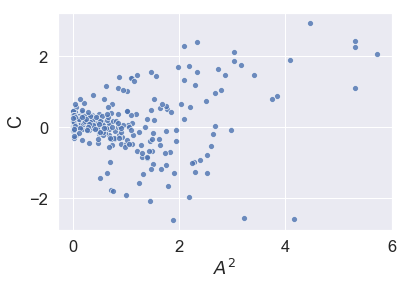

In [554]:
# The curvilinear relation is specially strong between A and C. I plotted the relation between the second order of A
# and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.A**2, y = df_norm.C, alpha = 0.8)
plt.xlabel('$A^2$')

Text(0.5, 0, 'A*B')

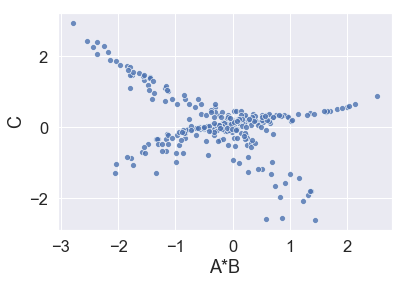

In [555]:
# Plot the interaction term of A*B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.B*df_norm.A, y = df_norm.C, alpha = 0.8)
plt.xlabel('A*B')

The plot above seems to show two linear trend between A*B and C.

Text(0.5, 0, '$A^2*B$')

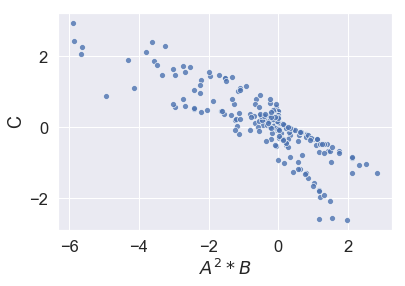

In [556]:
# Plot the interaction term of A^2*B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.A**2 * df_norm.B, y = df_norm.C, alpha = 0.8)
plt.xlabel('$A^2*B$')

There seems to be a downward linear trend between $A^2*B$ and C. <br>
**The above scatter plots provide good suggestions of higher-order terms which I could consider to include in the regression model**

## OLS model from scratch
I want to implement my own OLS estimation based on the derivation of OLS coefficients.

Making use of the OLS estimation of coefficients. <br>
$$ Beta = (X^TX)^{-1}X^Ty $$ <br>
This is derived by minimizing the sum square of error, i.e., $ e^2 = e^Te = (y-\hat{y})^T(y-\hat{y}) $

I will build:
1. OLS regression model using predictors A and B
2. Polynomial regression using predictors A and B, and relevant higher-order terms 

In [81]:
# Implementing Ordinary Least Square estimation of regression
def my_own_OLS(X,y):
    from numpy.linalg import inv
    n = len(y)
    p = X.shape[1]
    beta = inv(X.T@X) @ X.T @ y
    y_pred = X@beta
    res = y - y_pred
    RMSE = np.sum(res**2)/len(res)
    adj_R_sq = 1 - (np.sum(res**2)/(n-p))/(np.sum((y-y.mean())**2)/(n-1))
    print('The coefficients are:') 
    print(beta)
    print('The RMSE for the regression model is ', RMSE)
    print('The adjusted R square for the regression model is ', adj_R_sq)
    return beta, y_pred, res, RMSE, adj_R_sq

**OLS regression model using predictors A and B**

In [82]:
X = df_norm.iloc[:,0:2]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

y = df_norm.iloc[:,2:3].values

In [83]:
beta_ols, y_pred_ols, res_ols, RMSE_ols, adjR_sq_ols = my_own_OLS(X,y)

The coefficients are:
[[ 0.09355424]
 [ 0.0860908 ]
 [-0.49645476]]
The RMSE for the regression model is  0.34082304164475397
The adjusted R square for the regression model is  0.43731962536628666


So the first order OLS linear equation is: $ C = 0.094 + 0.086*A - 0.496*B $ <br>
The RMSE is 0.34. The adjusted R square is 0.44.

Residual analysis

Text(0, 0.5, 'Residual')

Text(0.5, 0, 'Fitted C')

Text(0, 0.5, 'Residual')

Text(0, 0.5, 'Residual')

Text(0, 0.5, 'Residual')

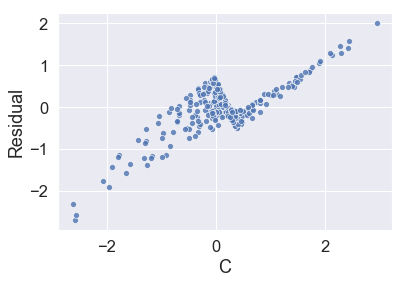

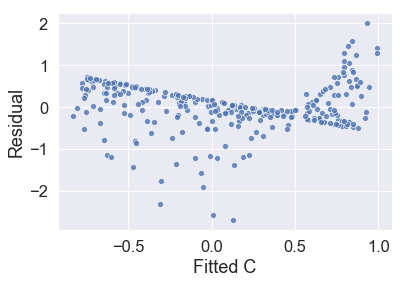

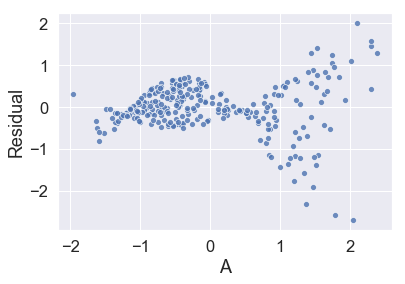

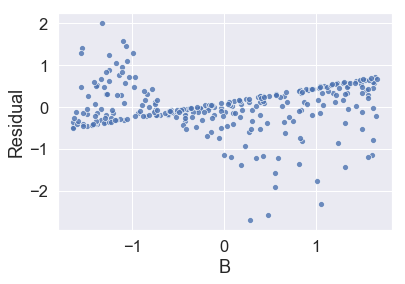

In [582]:
# Plot residuals against response variable
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.C, y = np.reshape(res_ols, -1), alpha = 0.8)
plt.ylabel('Residual') 

# Plot residuals against the fitted values
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = np.reshape(y_pred_ols, -1), y = np.reshape(res_ols, -1), alpha = 0.8)
plt.xlabel('Fitted C')
plt.ylabel('Residual')

# Plot residuals against the predictor A
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.A, y = np.reshape(res_ols, -1), alpha = 0.8)
plt.ylabel('Residual')

# Plot residuals against the predictor B
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.B, y = np.reshape(res_ols, -1), alpha = 0.8)
plt.ylabel('Residual')

Residual plots show the nonlinearity and heteroscedasticity issues too. <br>
Ideally the residual should be uniformly distributed around the value 0, i.e., an uniform band of points around 0.

**Polynomial regression using predictors A and B, and relevant higher-order terms**

In [9]:
df_norm['A^2'] = df_norm.A**2
df_norm['A*B'] = df_norm.A*df_norm.B
df_norm['A^2*B'] = df_norm.A**2 * df_norm.B
df_norm.head()

,A,B,C,C_inverse,A^2,A*B,A^2*B
0,-0.316690,-0.737365,0.277041,3.609568,0.100292,0.233516,-0.073952
1,-0.650791,-1.088118,0.281248,3.555584,0.423529,0.708138,-0.460850
2,-0.237033,0.829336,0.070373,14.210047,0.056184,-0.196580,0.046596
3,0.224907,1.016405,-0.219300,-4.559964,0.050583,0.228596,0.051413
4,-0.701786,1.631059,-0.194062,-5.152985,0.492503,-1.144654,0.803302


In [10]:
X_poly = df_norm[['A','B','A*B','A^2','A^2*B']].values
y = df_norm.iloc[:,2:3].values

In [13]:
beta_ploy, y_pred_poly, res_poly, RMSE_poly, adjR_sq_poly = my_own_OLS(X_poly,y)

The coefficients are:
[[-0.17672057]
 [-0.22548328]
 [-0.44360523]
 [-0.26389787]
 [-0.51529983]]
The RMSE for the regression model is  0.014560612501699894
The adjusted R square for the regression model is  0.9757931143378183


So the Polynomial OLS linear equation is: $C = - 0.177*A - 0.225*B - 0.444*AB - 0.264*A^2 -0.515*A^2B $ <br>
The RMSE is 0.01. The adjusted R square is about 0.98.

Residual analysis

Text(0, 0.5, 'Polynomial Residual')

Text(0.5, 0, 'Fitted C')

Text(0, 0.5, 'Polynomial Residual')

Text(0, 0.5, 'Polynomial Residual')

Text(0, 0.5, 'Polynomial Residual')

Text(0, 0.5, 'Polynomial Residual')

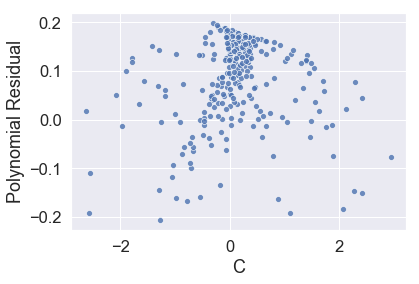

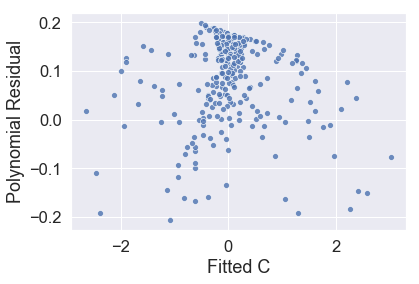

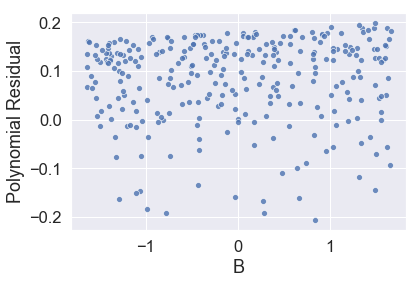

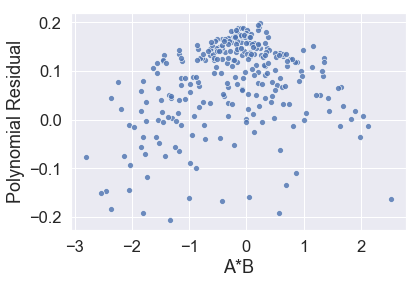

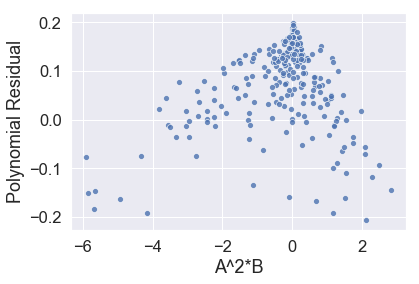

In [603]:
# Plot residuals against response variable
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.C, y = np.reshape(res_poly, -1), alpha = 0.8)
plt.ylabel('Polynomial Residual') 

# Plot residuals against the fitted values
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = np.reshape(y_pred_poly, -1), y = np.reshape(res_poly, -1), alpha = 0.8)
plt.xlabel('Fitted C')
plt.ylabel('Polynomial Residual')

# Plot residuals against the predictor B
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.B, y = np.reshape(res_poly, -1), alpha = 0.8)
plt.ylabel('Polynomial Residual')

# Plot residuals against the predictor A*B
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm['A*B'], y = np.reshape(res_poly, -1), alpha = 0.8)
plt.ylabel('Polynomial Residual')

# Plot residuals against the predictor A*B
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm['A^2*B'], y = np.reshape(res_poly, -1), alpha = 0.8)
plt.ylabel('Polynomial Residual')


The residual plots still do not look perfect. To double check whether the model is good, I could write my own code to split data into training and testing sets, see if the trained polynomial regression model performs well on the test set.

In [68]:
np.random.seed(66)
idx_test = np.random.randint(291, size = int(291*0.25)) 

In [69]:
X_test = X_poly[idx_test,:]
y_test = y[idx_test]

In [70]:
idx = [i for i in range(291)]
idx_train = [i for i in range(291) if i not in idx_test]

In [71]:
X_train = X_poly[idx_train,:]
y_train = y[idx_train]

In [72]:
beta_train, y_pred_train, res_train, RMSE_train, adjR_sq_train = my_own_OLS(X_train,y_train)

The coefficients are:
[[-0.17699075]
 [-0.22257957]
 [-0.43669728]
 [-0.26201619]
 [-0.51482449]]
The RMSE for the regression model is  0.014768889200547483
The adjusted R square for the regression model is  0.976154333009898


So the Polynomial OLS linear equation from the training set is: $C = - 0.177*A - 0.223*B - 0.437*AB - 0.262*A^2 -0.515*A^2B $ <br>
The RMSE is 0.01. The adjusted R square is about 0.98. <br>
Now let's test how this model performs with the testing set.

In [73]:
y_pred_test = X_test@beta_train
res_test = y_test - y_pred_test
n = len(y_test)
p = X_test.shape[1]
RMSE_test = (res_test**2).sum()/n
adj_Rsq_test = 1 - (np.sum(res_test**2)/(n-p))/(np.sum((y_test-y_test.mean())**2)/(n-1))

In [74]:
print('The RMSE for test data is ', RMSE_test)
print('The adjusted R square for test data is ', adj_Rsq_test)

The RMSE for test data is  0.01428967593662008
The adjusted R square for test data is  0.9738418345346103


I tried other random splits of the train and test set by changing the random seed, all the polynomial regressions with A, B, AB, A^2, and A^2*B terms fit well with the test set. Therefore the polynomial regression,

$$ C = - 0.18*A - 0.22*B - 0.44*AB - 0.26*A^2 -0.52*A^2B $$

seem to be a good regression model for the data (I rounded the coefficients for simplicity). <br> 
Also we should be aware of the common limitation for  polynomial regression. It's oftentimes not proper to be extrapolated beyond the scope of the observed values. 

## Furture Directions
There are some other interesting approaches that worthwhile trying to solve this problem if given more time.
### Weighted Least Square
To address the heteroscedasticity issue, I could apply weighted least squares. Previously, the regular OLS residual plot shows a megaphone shape with the predictor A. In this case, it is the common way to regress the absolute values of the OLS residual against A. The resulting fitted value of this regression can be estimates of $ \sigma_i $. <br>
I implemented this thought briefly here. More can be implemented if time permits.

In [84]:
# Regress the absolute residual (response variable) against A (predictor)
ones = np.ones([X.shape[0],1])
X_A = np.concatenate((ones,df_norm.iloc[:,0:1]),axis=1)

sigma_i = my_own_OLS(X_A, abs(res_ols))[1]

The coefficients are:
[[0.41862743]
 [0.23860149]]
The RMSE for the regression model is  0.1224163849406633
The adjusted R square for the regression model is  0.29876738758796184


In [93]:
W = np.diag(1/np.reshape(sigma_i,-1)**2)

In [95]:
from numpy.linalg import inv
beta_wls = inv(X.T @ W @ X) @ X.T @ W @ y

In [96]:
beta_wls

array([[ 0.17853443],
       [ 0.34651806],
       [-0.54652423]])

In [101]:
# Automate the process
def my_own_WLS(X,y,W):
    from numpy.linalg import inv
    beta_wls = inv(X.T @ W @ X) @ X.T @ W @ y
    y_pred = X@beta_wls
    res = y - y_pred
    RMSE = sum(res**2)/len(res)
    adj_R_sq = 1 - (np.sum(res**2)/(n-p))/(np.sum((y-y.mean())**2)/(n-1))
    print('The coefficients are:') 
    print(beta_wls)
    print('The RMSE for the regression model is ', RMSE)
    print('The adjusted R square for the regression model is ', adj_R_sq)
    return beta_wls, y_pred, res, RMSE, adj_R_sq

In [102]:
res_WLS = my_own_WLS(X,y,W)[2]

The coefficients are:
[[ 0.17853443]
 [ 0.34651806]
 [-0.54652423]]
The RMSE for the regression model is  [0.41788811]
The adjusted R square for the regression model is  0.2739427468798138


With one reweighting, the regression model does not seem to perform better than regular OLS, suggesting iterative weighted least square is needed. If time permits, I would implement the iteratively reweighted least square methods from scratch. Python packages like statsmodels.robust.robust_linear_model.RLM handles iteratively reweighted least squares too.

### Fitting multiple regression equations

As shown in the scatter plots, it seems that C has different patterns before and after a turning point of the predictors, A and B. Taking the original data as an example, the scatter plot below shows different patterns of A and C and different patterns of B and C, between A or B is smaller than 0 and A or B is larger than 0.

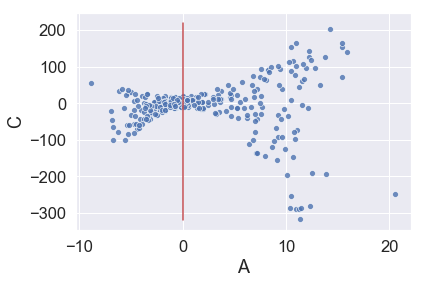

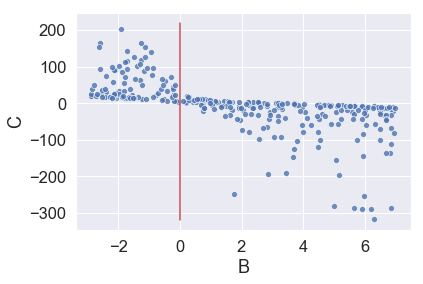

In [109]:
# Scatter plot for A and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.A, y = df.C, alpha = 0.8)

x_line = np.zeros(1000)
y_line = np.linspace(-320,220,1000)
plt.plot(x_line,y_line,color = 'r')

# Scatter plot for B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df.B, y = df.C, alpha = 0.8)
plt.plot(x_line,y_line,color = 'r')

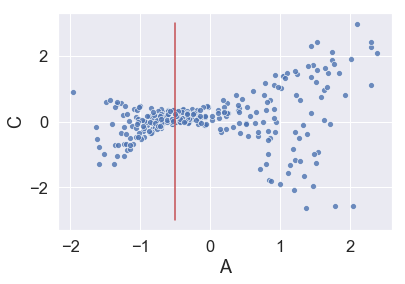

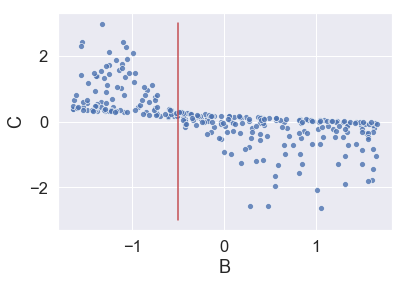

In [111]:
# Scatter plot for norme A and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.A, y = df_norm.C, alpha = 0.8)

x_line = np.zeros(100)-0.5
y_line = np.linspace(-3,3,100)
plt.plot(x_line,y_line,color = 'r')

# Scatter plot for normed B and C
fig = plt.figure()
sns.set(font_scale = 1.5)
sns.scatterplot(x = df_norm.B, y = df_norm.C, alpha = 0.8)
plt.plot(x_line,y_line,color = 'r')

For future exploration, I split the normed data into 4 parts, using -0.5 as a turning point for normed A and B:
- part 1: A <= -0.5, B <= -0.5 
- part 2: A > -0.5, B > -0.5 
- part 3: A > -0.5, B <= -0.5 
- part 4: A <= -0.5, B > -0.5 

In [134]:
norm_df1 = df_norm[(df_norm.A <= -0.5) & (df_norm.B <= -0.5)]
norm_df2 = df_norm[(df_norm.A > -0.5) & (df_norm.B > -0.5)]
norm_df3 = df_norm[(df_norm.A > -0.5) & (df_norm.B <= -0.5)]
norm_df4 = df_norm[(df_norm.A <= -0.5) & (df_norm.B > -0.5)]

In [135]:
len(norm_df1)+len(norm_df2)+len(norm_df3)+len(norm_df4)

291

**Fit the first part of data**

In [136]:
X1 = norm_df1.iloc[:,0:2]
ones = np.ones([X1.shape[0],1])
X1 = np.concatenate((ones,X1),axis=1)

y1 = norm_df1.iloc[:,2:3].values

In [137]:
beta_ols1, y_pred_ols1, res_ols1, RMSE_ols1, adjR_sq_ols1 = my_own_OLS(X1,y1)

The coefficients are:
[[-0.23458388]
 [-0.29677953]
 [-0.26682487]]
The RMSE for the regression model is  0.004554738385098176
The adjusted R square for the regression model is  0.8290518705576153


So the OLS linear equation for the first part of data, for normed A <= -0.5 and normed B <= -0.5, is: 
<br>

$$ C = -0.235 - 0.297*A - 0.267*B $$

The model performs much more better than the regular OLS with the entire data set. The RMSE is about 0.005. The adjusted R square is about 0.83.

**Fit the second part of data**

In [138]:
X2 = norm_df2.iloc[:,0:2]
ones = np.ones([X2.shape[0],1])
X2 = np.concatenate((ones,X2),axis=1)

y2 = norm_df2.iloc[:,2:3].values

In [139]:
beta_ols2, y_pred_ols2, res_ols2, RMSE_ols2, adjR_sq_ols2 = my_own_OLS(X2,y2)

The coefficients are:
[[ 0.22219945]
 [-0.84190296]
 [-0.51254058]]
The RMSE for the regression model is  0.12895409391015494
The adjusted R square for the regression model is  0.7218209006227111


So the OLS linear equation for the first part of data, for normed A > -0.5 and normed B > -0.5, is: 
<br>

$$ C = 0.222 - 0.842*A - 0.513*B $$

The model performs much more better than the regular OLS with the entire data set too. The RMSE is about 0.13. The adjusted R square is about 0.72.

**Fit the third part of data**

In [140]:
X3 = norm_df3.iloc[:,0:2]
ones = np.ones([X3.shape[0],1])
X3 = np.concatenate((ones,X3),axis=1)

y3 = norm_df3.iloc[:,2:3].values

In [141]:
beta_ols3, y_pred_ols3, res_ols3, RMSE_ols3, adjR_sq_ols3 = my_own_OLS(X3,y3)

The coefficients are:
[[-0.62094233]
 [ 0.67564642]
 [-0.9438005 ]]
The RMSE for the regression model is  0.07814923363227697
The adjusted R square for the regression model is  0.8197713224327119


So the OLS linear equation for the first part of data, for normed A > -0.5 and normed B <= -0.5, is: 
<br>

$$ C = -0.621 + 0.676*A - 0.944*B $$

The model performs much more better than the regular OLS with the entire data set too. The RMSE is about 0.08. The adjusted R square is about 0.82.

**Fit the fourth part of data**

In [142]:
X4 = norm_df4.iloc[:,0:2]
ones = np.ones([X4.shape[0],1])
X4 = np.concatenate((ones,X4),axis=1)

y4 = norm_df4.iloc[:,2:3].values

In [143]:
beta_ols4, y_pred_ols4, res_ols4, RMSE_ols4, adjR_sq_ols4 = my_own_OLS(X4,y4)

The coefficients are:
[[ 0.84700176]
 [ 0.94924157]
 [-0.31526016]]
The RMSE for the regression model is  0.01388349060505733
The adjusted R square for the regression model is  0.8841483680350518


So the OLS linear equation for the first part of data, for normed A <= -0.5 and normed B > -0.5, is: 
<br>

$$ C = 0.847 + 0.949*A - 0.315*B $$

The model performs much more better than the regular OLS with the entire data set too. The RMSE is about 0.01. The adjusted R square is about 0.88.

To sum up, when fitting multiple equations for different ranges of predictors, I have:

$$ C = -0.235 - 0.297*A - 0.267*B \hspace{2cm}      for A <= -0.5, B <= -0.5$$

$$ C = 0.222 - 0.842*A - 0.513*B \hspace{2cm}      for A > -0.5, B > -0.5$$

$$ C = -0.621 + 0.676*A - 0.944*B \hspace{2cm}      for A > -0.5, B <= -0.5$$

$$ C = 0.847 + 0.949*A - 0.315*B \hspace{2cm}      for A <= -0.5, B > -0.5$$

The limitation for fitting multiple regression equations is that we lose simplicity and it also has issues to extrapolate to ranges outside the observations.